
================ LINEAR REGRESSION ================

MSE : 437.54985402070196
MAE : 16.040541887491848
R2 Score : 0.9449706590105937

Coefficient : 86.51154197687389
Intercept : 2.4461021846792352


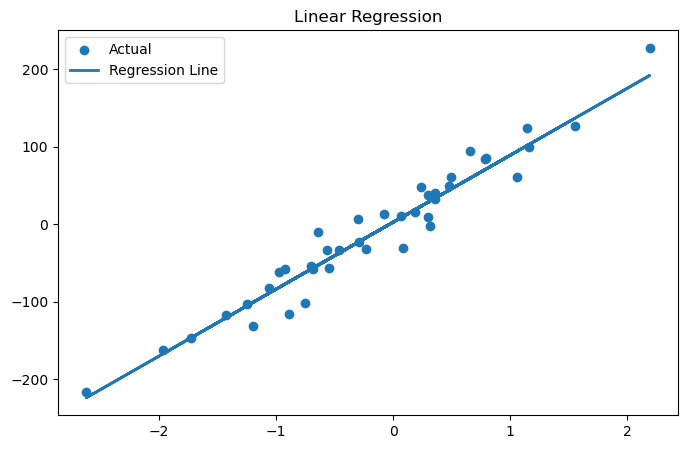


================ LOGISTIC REGRESSION ================

Accuracy : 0.9122807017543859
Precision : 0.9178082191780822
Recall : 0.9436619718309859
F1 Score : 0.9305555555555556


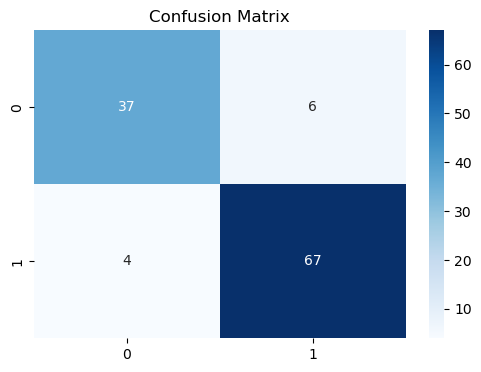


Coefficients : [[-0.97957826 -0.22361619]]
Intercept : [18.84565222]


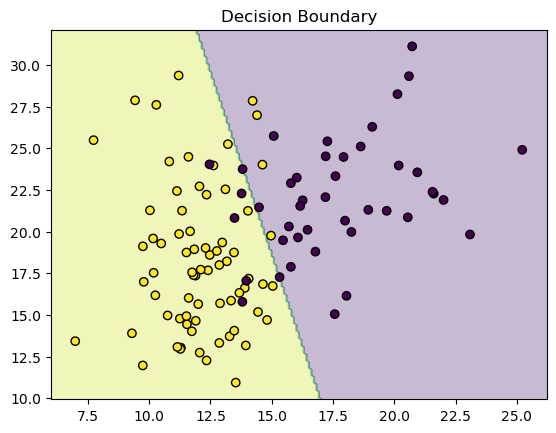


================ RIDGE & LASSO ================

Ridge Coefficient : [85.86904643]
Lasso Coefficient : [86.39182563]

================ POLYNOMIAL REGRESSION ================

Polynomial R2 : 0.9445553583214906

====== LOGISTIC REGULARIZATION COMPARISON ======

C=0.01 Accuracy: 0.9035087719298246
C=0.1 Accuracy: 0.9035087719298246
C=1 Accuracy: 0.9122807017543859
C=10 Accuracy: 0.9122807017543859

================ ROC CURVE ================



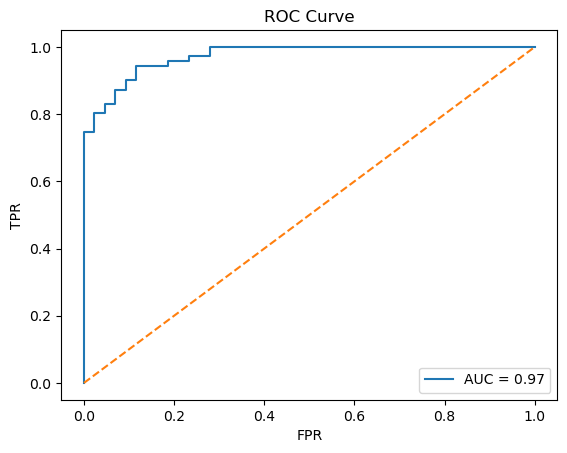


================ CROSS VALIDATION ================

CV Scores : [0.94658495 0.91496961 0.95077849 0.93213401 0.94293451]
Average Score : 0.9374803149109777

=========== EXPERIMENT COMPLETED SUCCESSFULLY ===========


In [1]:
# ==========================================================
# EXPERIMENT #4
# LINEAR REGRESSION + LOGISTIC REGRESSION + EXTENSIONS
# ==========================================================

# ================= IMPORT LIBRARIES =================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ==========================================================
# PART A — LINEAR REGRESSION
# ==========================================================

print("\n================ LINEAR REGRESSION ================\n")

# 1. Create Synthetic Dataset
X_reg, y_reg = make_regression(
    n_samples=200,
    n_features=1,
    noise=20,
    random_state=42
)

# 2. Train-Test Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

# 3. Train Model
lin_model = LinearRegression()
lin_model.fit(Xr_train, yr_train)

# 4. Predictions
yr_pred = lin_model.predict(Xr_test)

# 5. Metrics
print("MSE :", mean_squared_error(yr_test, yr_pred))
print("MAE :", mean_absolute_error(yr_test, yr_pred))
print("R2 Score :", r2_score(yr_test, yr_pred))

# 6. Coefficients
print("\nCoefficient :", lin_model.coef_[0])
print("Intercept :", lin_model.intercept_)

# 7. Regression Plot
plt.figure(figsize=(8,5))
plt.scatter(Xr_test, yr_test, label="Actual")
plt.plot(Xr_test, yr_pred, linewidth=2, label="Regression Line")
plt.title("Linear Regression")
plt.legend()
plt.show()

# ==========================================================
# PART B — LOGISTIC REGRESSION
# ==========================================================

print("\n================ LOGISTIC REGRESSION ================\n")

# 1. Load Dataset
data = load_breast_cancer()
X_log = data.data[:, :2]   # 2 features for visualization
y_log = data.target

# 2. Split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    X_log, y_log,
    test_size=0.2,
    random_state=42
)

# 3. Train Model
log_model = LogisticRegression(max_iter=5000)
log_model.fit(Xl_train, yl_train)

# 4. Predictions
yl_pred = log_model.predict(Xl_test)

# 5. Metrics
print("Accuracy :", accuracy_score(yl_test, yl_pred))
print("Precision :", precision_score(yl_test, yl_pred))
print("Recall :", recall_score(yl_test, yl_pred))
print("F1 Score :", f1_score(yl_test, yl_pred))

# 6. Confusion Matrix
cm = confusion_matrix(yl_test, yl_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 7. Coefficients
print("\nCoefficients :", log_model.coef_)
print("Intercept :", log_model.intercept_)

# 8. Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(Xl_test, yl_test, log_model)

# ==========================================================
# POST-LAB EXTENSIONS
# ==========================================================

print("\n================ RIDGE & LASSO ================\n")

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(Xr_train, yr_train)
lasso.fit(Xr_train, yr_train)

print("Ridge Coefficient :", ridge.coef_)
print("Lasso Coefficient :", lasso.coef_)

# ==========================================================

print("\n================ POLYNOMIAL REGRESSION ================\n")

poly_model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

poly_model.fit(Xr_train, yr_train)
yr_poly_pred = poly_model.predict(Xr_test)

print("Polynomial R2 :",
      r2_score(yr_test, yr_poly_pred))

# ==========================================================

print("\n====== LOGISTIC REGULARIZATION COMPARISON ======\n")

for c in [0.01, 0.1, 1, 10]:
    lr = LogisticRegression(C=c, max_iter=5000)
    lr.fit(Xl_train, yl_train)
    print(f"C={c} Accuracy:",
          lr.score(Xl_test, yl_test))

# ==========================================================

print("\n================ ROC CURVE ================\n")

y_prob = log_model.predict_proba(Xl_test)[:,1]

fpr, tpr, _ = roc_curve(yl_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# ==========================================================

print("\n================ CROSS VALIDATION ================\n")

cv_scores = cross_val_score(
    LinearRegression(),
    X_reg,
    y_reg,
    cv=5
)

print("CV Scores :", cv_scores)
print("Average Score :", cv_scores.mean())

# ==========================================================
print("\n=========== EXPERIMENT COMPLETED SUCCESSFULLY ===========")

